# Preamble

In [6]:
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\oih\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\oih\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "c:\Users\oih\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 7

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [ ]:
titanic = pd.read_csv('Titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Ready datasets

First clean up the data a little

In [ ]:
#one-hot encode categorical features
male_column = pd.get_dummies(titanic["Sex"])[['male']]
embark_columns = pd.get_dummies(titanic["Embarked"])

#replace categorical features with new features
titanic = pd.concat([titanic, male_column, embark_columns], axis='columns').drop(['Sex', 'Embarked'], axis='columns')

#drop non-categorical text features
titanic = titanic.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'Fare'], axis='columns')

#drop data with NaN values
titanic = titanic.dropna()

titanic.columns.to_numpy()

array(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'male', 'C', 'Q',
       'S'], dtype=object)

Train and test sets

In [ ]:
y = titanic['Survived']
X = titanic.drop('Survived', axis='columns')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=504)


# Training a decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=504)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=504)

<font size = 6>What could possibly go wrong?</font>

In [ ]:
tree_clf.score(X_train, y_train)

0.9474605954465849

Looks like overfitting. How about the test?

In [ ]:
tree_clf.score(X_test, y_test)

0.7832167832167832

Unconstrained decision trees tend to overfit, because they end up close to full binary search trees. This is also known as _pre-pruning_
We can constrain decision trees in several ways. Let's look at three important hyper-parameters.
* max_depth - puts a limit on how deep the tree can get. *Note*: The tree must be deep enough to accomodate all classes in the classification: 2^depth >= classes
* min_samples_split - forces a minimum of samples in a node before it gets split into subnodes
* max_features - forces the algorithm to only consider a certain number of features per node

### max_depth

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=504, max_depth=3)
tree_clf.fit(X_train, y_train)

tree_clf.score(X_train, y_train), tree_clf.score(X_test, y_test)

(0.8073555166374781, 0.7832167832167832)

This decision tree is much less likely to overfit, because it is forced to generalized more. Of course, if the tree is too shallow, it will underfit.

Let's see how under- and overfitting depends on tree depth.

In [ ]:
def plot_results(train_score, test_score, train_label = None, test_label = None, xlabel = None, ylabel = None, xvalues = None, ax = None):
    if not ax:
        fig, ax = plt.subplots(1, 1)
    if not xvalues: xvalues = range(1, len(train_score) + 1)
    ax.plot(xvalues,train_score,'-', label = train_label)
    ax.plot(xvalues,test_score,'-', label = test_label)
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)
    if xlabel or ylabel: ax.legend()


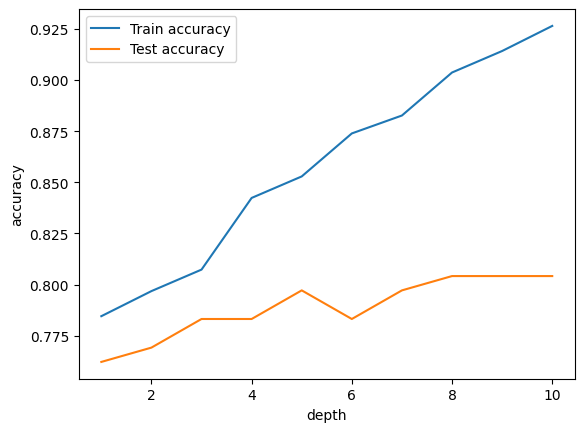

In [ ]:
features = range(1, 11)

classifiers = [DecisionTreeClassifier(random_state=504, max_depth=d) for d in features]
for clf in classifiers: clf.fit(X_train, y_train)

train_scores = [clf.score(X_train, y_train) for clf in classifiers]
val_scores = [clf.score(X_test, y_test) for clf in classifiers]
plot_results(train_scores, val_scores, train_label="Train accuracy", test_label="Test accuracy", xlabel="depth", ylabel="accuracy")

This illustrates quite clearly how dangerous overfitting is for decision trees. Anyway, looks like a depth of 3 is the sweet spot.

### min_samples_split
Another way of constraining the tree is to be more reluctant to split. For instance, don't split further if there are no more than 10 samples in a leaf.

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=504, min_samples_split=10)
tree_clf.fit(X_train, y_train)

tree_clf.score(X_train, y_train), tree_clf.score(X_test, y_test)

(0.882661996497373, 0.8041958041958042)

Let's see how the tree performs on different minimal node sizes.

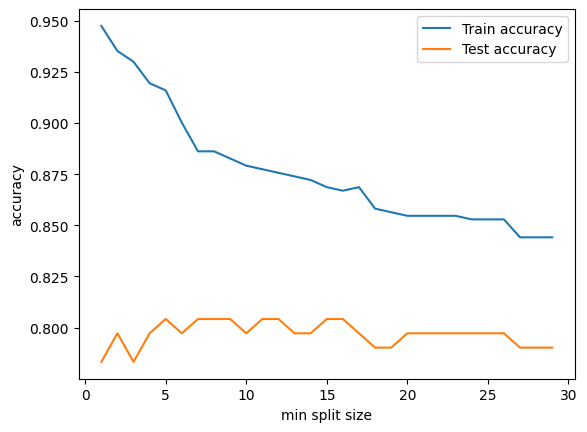

In [ ]:
split_sizes = range(2, 31)

classifiers = [DecisionTreeClassifier(random_state=504, min_samples_split=s) for s in split_sizes]
for clf in classifiers: clf.fit(X_train, y_train)

train_scores = [clf.score(X_train, y_train) for clf in classifiers]
val_scores = [clf.score(X_test, y_test) for clf in classifiers]
plot_results(train_scores, val_scores, train_label="Train accuracy", test_label="Test accuracy", xlabel="min split size", ylabel="accuracy")

A shallow tree will usually have rather large samples in the leaves, so it doesn't make much sense to mix max_depth and min_samples_split.

An alternative way of telling the algorithm "only split if it's worth it" is to forbid splitting a node unless the improvement is big enough: min_impurity_decrease (see visualization)

### max_features

This is an odd duck. At each node the algorithm chooses a random subset of the features, which are used to evaluate the best split. It does *not* mean 'only split on the best n features', it means 'split on n *random* features'.

This makes for a faster algorithm if we have many features, but it also introduces random bias.

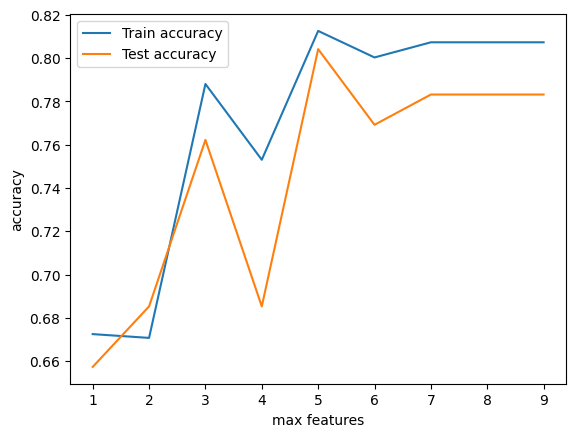

In [ ]:
features = range(1, 10)

classifiers = [DecisionTreeClassifier(random_state=504, max_features=f, max_depth=3) for f in features]
for clf in classifiers: clf.fit(X_train, y_train)

train_scores = [clf.score(X_train, y_train) for clf in classifiers]
val_scores = [clf.score(X_test, y_test) for clf in classifiers]
plot_results(train_scores, val_scores, train_label="Train accuracy", test_label="Test accuracy", xlabel="max features", ylabel="accuracy")

Clearly, max_features should be 4. 

**What am I doing wrong here?**

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=504, max_features=4, max_depth=3)
tree_clf.fit(X_train, y_train)

tree_clf.score(X_train, y_train), tree_clf.score(X_test, y_test)

(0.7530647985989493, 0.6853146853146853)

While this looks nice and not at all overfitting, we are tuning the hyperparameters on the test set. Now we need another set for validation.

# Train-Validation-Test Set

Let's split into train, test, and validation sets.

In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=.2, random_state=504)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size = .2, random_state=504)

X_train.shape, X_val.shape, X_test.shape

((456, 8), (115, 8), (143, 8))

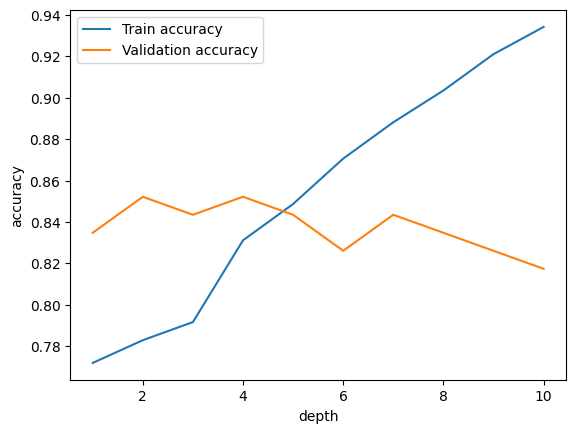

In [ ]:
features = range(1, 11)

classifiers = [DecisionTreeClassifier(random_state=504, max_depth=d) for d in features]
for clf in classifiers: clf.fit(X_train, y_train)

train_scores = [clf.score(X_train, y_train) for clf in classifiers]
val_scores = [clf.score(X_val, y_val) for clf in classifiers]
plot_results(train_scores, val_scores, train_label="Train accuracy", test_label="Validation accuracy", xlabel="depth", ylabel="accuracy")

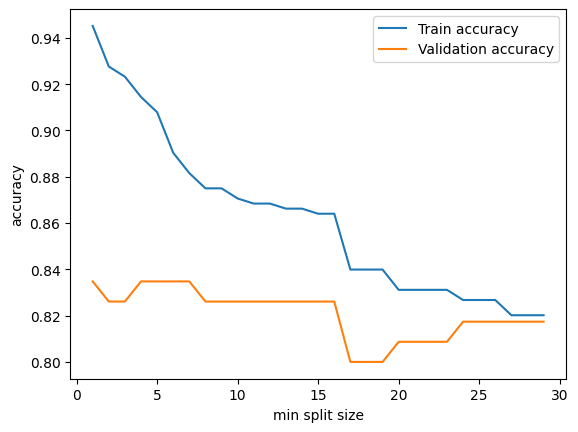

In [ ]:
split_sizes = range(2, 31)

classifiers = [DecisionTreeClassifier(random_state=504, min_samples_split=s) for s in split_sizes]
for clf in classifiers: clf.fit(X_train, y_train)

train_scores = [clf.score(X_train, y_train) for clf in classifiers]
val_scores = [clf.score(X_val, y_val) for clf in classifiers]
plot_results(train_scores, val_scores, train_label="Train accuracy", test_label="Validation accuracy", xlabel="min split size", ylabel="accuracy")

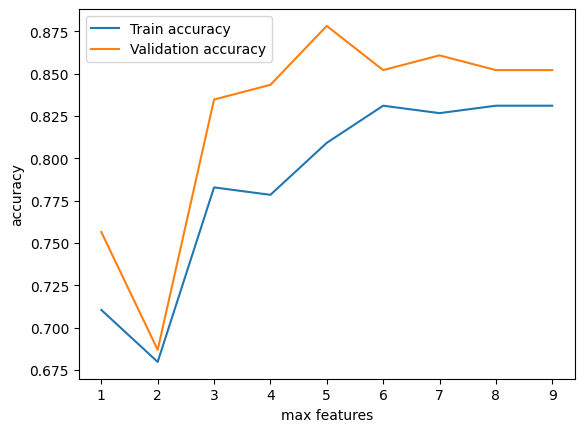

In [ ]:
features = range(1, 10)

classifiers = [DecisionTreeClassifier(random_state=504, max_features=f, max_depth=4) for f in features]
for clf in classifiers: clf.fit(X_train, y_train)

train_scores = [clf.score(X_train, y_train) for clf in classifiers]
val_scores = [clf.score(X_val, y_val) for clf in classifiers]
plot_results(train_scores, val_scores, train_label="Train accuracy", test_label="Validation accuracy", xlabel="max features", ylabel="accuracy")

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=504, max_features=5, max_depth=4)
tree_clf.fit(X_train, y_train)

tree_clf.score(X_train, y_train), tree_clf.score(X_test, y_test)

(0.8092105263157895, 0.8111888111888111)

# Cross Validation

Let us instead search for the best solution using cross validation. The nice thing about cross validation is that it doesn't use the test set for validation but part of the train set. So we can still test for overfitting.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=504)

from sklearn.model_selection import GridSearchCV
depths = range(1, 11)
split_sizes = range(2, 21)
features = range(1, 9)
params = {'min_samples_split': split_sizes, 
          'max_depth': depths, 
          'max_features': features}

gsc = GridSearchCV(DecisionTreeClassifier(random_state=504), params, n_jobs=16)
gsc.fit(X_train, y_train)
gsc.best_estimator_
gsc.best_params_

NameError: name 'train_test_split' is not defined

In [ ]:
gsc.score(X_train, y_train), gsc.score(X_test, y_test)

(0.851138353765324, 0.8181818181818182)

This seems good, but try it with some different random seeds. There is a lot of noise here, and it's probably best to keep it simple. 

In [ ]:
importances = zip(X_train.keys(), gsc.best_estimator_.feature_importances_) #pairs up feature names with performance score
sorted(importances, key=lambda p: -p[1])

[('male', 0.4726183797800356),
 ('Pclass', 0.2437117108791281),
 ('Age', 0.20160975835510267),
 ('SibSp', 0.07180833548200928),
 ('Parch', 0.004780193720518186),
 ('Q', 0.0028917809492714232),
 ('S', 0.0025798408339347124),
 ('C', 0.0)]